Saved plot to `errors_plot.png`


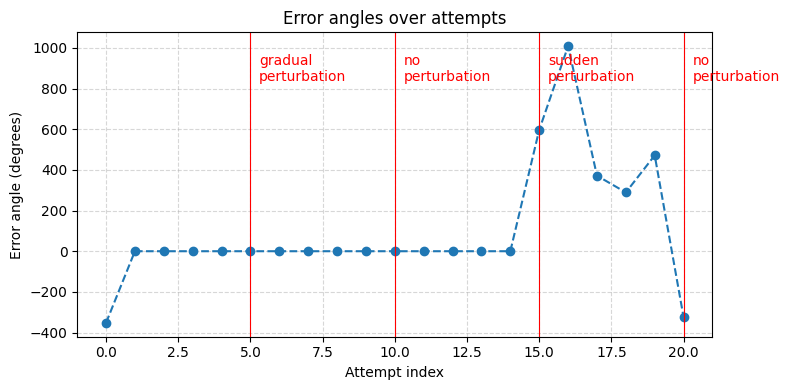

In [26]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

# Interval for perturbations
Interval_General = (5, 10)
Interval_Sudden = (15, 20)


def read_error_list(csv_path):
    """ Read error angles (radians) from a CSV file """
    results = []
    with open(csv_path, newline='') as f:
        reader = csv.reader(f)
        rows = list(reader)
        if not rows:
            return results

        start_row = 0
        first = rows[0]

        # skip header
        for row in rows[1:]:
            val = ''
            if len(row) >= 2:
                val = row[1].strip()
            elif len(row) == 1:
                val = row[0].strip()
            if val == '':
                results.append(float('nan'))
            else:
                try:
                    results.append(float(val))
                except:
                    results.append(float('nan'))
    return results

def plot_errors(lst, pngfile):
    """ Plot error angles from list of floats (radians), save to pngfile """
    arr = np.array(lst, dtype=float)
    idx = np.arange(len(arr))
    valid = ~np.isnan(arr)

    plt.figure(figsize=(8, 4))
    plt.plot(idx[valid], np.degrees(arr[valid]), marker='o', linestyle='--')

    # highlight the experiment segments
    plt.axvline(x=Interval_General[0], color='red', linewidth=0.8)
    plt.axvline(x=Interval_General[1], color='red', linewidth=0.8)
    plt.axvline(x=Interval_Sudden[0], color='red', linewidth=0.8)
    plt.axvline(x=Interval_Sudden[1], color='red', linewidth=0.8)

    plt.text(Interval_General[0]+0.3, plt.ylim()[1]*0.9, 'gradual\nperturbation', color='red',va='top')
    plt.text(Interval_General[1]+0.3, plt.ylim()[1]*0.9, 'no\nperturbation', color='red',va='top')
    plt.text(Interval_Sudden[0]+0.3, plt.ylim()[1]*0.9, 'sudden\nperturbation', color='red',va='top')
    plt.text(Interval_Sudden[1]+0.3, plt.ylim()[1]*0.9, 'no\nperturbation', color='red',va='top')


    plt.xlabel('Attempt index')
    plt.ylabel('Error angle (degrees)')
    plt.title('Error angles over attempts')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    plt.savefig(pngfile)
    print('Saved plot to `errors_plot.png`')
    plt.show()
    # plt.close()

# plotting
errors = read_error_list('error_angles.csv')
plot_errors(errors, 'errors_plot.png')
